# Numerische Optimierungsverfahren – Eindimensional

In diesem Notebook sind zwei numerische Optimierungsverfahren zum Lösen von Minimierungsproblemen implementiert: 
das Bergsteigerverfahren und das Gradientenabstiegsverfahren.

In [182]:
# Pakete laden
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Funktion zum Plotten der Funktion und der Iterationsschritte

Hier wird eine Funktion definiert, mit der wir uns die Iterationsschritte der Verfahren und den Funktionsgraphen ausgeben lassen können.

In [183]:
def plot_results(f, iterations, start_x, optimal_x, optimal_value):
    x = np.linspace(-5, 5, 400)
    y = np.array([f(xi) for xi in x])

    # Plot der Funktion
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, label = 'Zielfunktion', linewidth = 4, color = 'grey')

    # Plotte Iterationen, Startwert, Endpunkt  
    plt.scatter(start_x, f(start_x), color='black', marker='v', s = 200, label='Startpunkt', zorder=4)
    plt.scatter(iterations[1:], [f(xi) for xi in iterations[1:]], marker='o', color='dimgray',  s = 100, label='Iterationsschritte',  zorder=3)
    plt.scatter(optimal_x, f(optimal_x), color='black', marker='o', s = 200, label='Lokaler Minimalpunkt', zorder=3)

    plt.xlabel('x', fontsize = 22)  
    plt.ylabel('f(x)', fontsize = 22)   

    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(fontsize=22)
    plt.grid(True)
    
    # plt.savefig('vorzeichenverfahren_1d.png', dpi=300, bbox_inches='tight')
    plt.savefig('gradientenverfahren_1d_guenstig.png', dpi=300, bbox_inches='tight')

    return plt.show()

## Definition verschiedener Zielfunktionen

In [184]:
# Definiere verschiedener eindimensionale Zielfunktionen und der zugehörigen Ableitungen
def f1(x):
    return np.cos(x) - 2 * np.sin(0.6 * x - 2) + 1 * np.cos(2 * x - 2)

def grad_f1(x):
    df_dx = -1 * np.sin(x) - 2 * 0.6 * np.cos(0.6 * x - 2) - 1 * 2 * np.sin(2 * x - 2)
    return df_dx

def f2(x):
    return x

def f3(x):
    return x

# Lege fest, für welche Zielfunktion die Verfahren eingesetzt werden
f = f1
grad_f_eindim = grad_f1

## Definiere einen Startwerte und eine Schrittweite

In [185]:
# Startwert
start_x = 0.0 # ungünstig: 1.5, ideal: 0.0

# Schrittweite
stepsize = 0.2 # ungünstig: 0.4, ideal: 0.2

# Maximale Anzahl Iterationen
num_steps = 1000

## Das Bergsteigerverfahren

In [186]:
# Bergsteigerverfahren
def bergsteigerverfahren(f, start_x, stepsize, num_steps,tolerance=1e-6):
    
    # Aktueller x-Wert jedes Iterationsschrittes
    x = start_x

    # Liste zum Speichern aller Iterationspunkte (für grafische Darstellung)
    iterations = [x]

    for i in range(num_steps):
        current_value = f(x)
        left_value = f(x - stepsize)
        right_value = f(x + stepsize)
        iterations.append(x)

        # Falls Funktionswert links kleiner als aktueller Funktionswert, gehe nach links
        if left_value < current_value:
            x_new = x - stepsize
            
        # Falls Funktionswert rechts kleiner als aktueller Funktionswert, gehe nach rechts
        elif right_value < current_value:
            x_new = x + stepsize
        else:
            break 
            
        if abs(x_new - x) < tolerance:
            break
        
        if abs(f(x_new) - f(x)) < tolerance:
            break
            
        if f(x_new) > f(x):
            break
            
        x = x_new

        
    print("Optimales x:", x)
    print("Minimalwert von f(x):", f(x))
    print("Anzahl Iterationsschritte:", len(np.array(iterations)))   
    
    return x, f(x), iterations


# Anwendung des Verfahrens
optimal_x, optimal_value, iterations = bergsteigerverfahren(f, start_x, stepsize, num_steps)
iterations

Optimales x: -3.800000000000001
Minimalwert von f(x): -3.5915900889413543
Anzahl Iterationsschritte: 21


[0.0,
 0.0,
 -0.2,
 -0.4,
 -0.6000000000000001,
 -0.8,
 -1.0,
 -1.2,
 -1.4,
 -1.5999999999999999,
 -1.7999999999999998,
 -1.9999999999999998,
 -2.1999999999999997,
 -2.4,
 -2.6,
 -2.8000000000000003,
 -3.0000000000000004,
 -3.2000000000000006,
 -3.400000000000001,
 -3.600000000000001,
 -3.800000000000001]

### Grafische Darstellung der Iterationsschritte

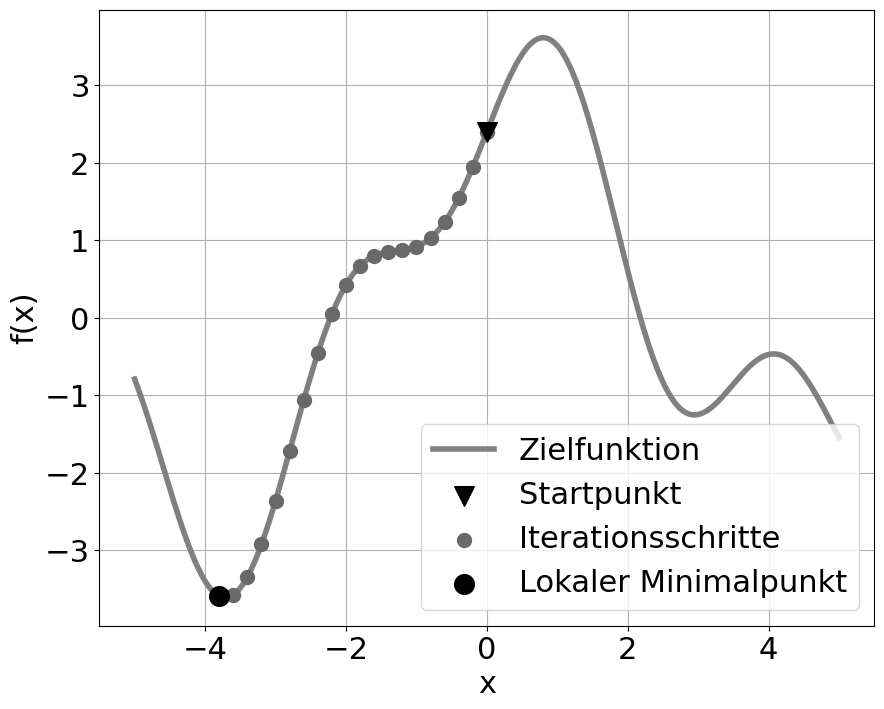

In [187]:
plot_results(f,iterations,start_x, optimal_x, optimal_value)

# Das Vorzeichenverfahren

### Anwendung des "Vorzeichenverfahrens" für eine Funktion in einer Variablen



In [188]:
def sign_descent(f, start_x, stepsize, num_steps, tolerance=1e-6):
    x = start_x
    iterations = [x]
    
    for i in range(num_steps):
        grad = grad_f_eindim(x)
        x_new = x - stepsize * np.sign(grad)
        iterations.append(x_new)
        
        if abs(x_new - x) < tolerance:
            break
        
        if abs(f(x_new) - f(x)) < tolerance:
            break
            
        if f(x_new) > f(x):
            break
        
        x = x_new

    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    print("Anzahl Iterationsschritte:", len(np.array(iterations)))
    return x, f(x), np.array(iterations)

# Wende das Gradientenabstiegsverfahren an
optimal_x, optimal_value, iterations = sign_descent(f, start_x, stepsize, num_steps)

# Failed bei start_x = 1.0 stepsize = 0.1 num_steps = 1000

Optimales x: -3.8
Minimalwert von f(x): -3.5916
Anzahl Iterationsschritte: 21


### Plotten der Funktion und der Iterationsschritte
Die Iterationsschritte und den Funktionsgraphen werden im Folgenden grafisch dargestellt.

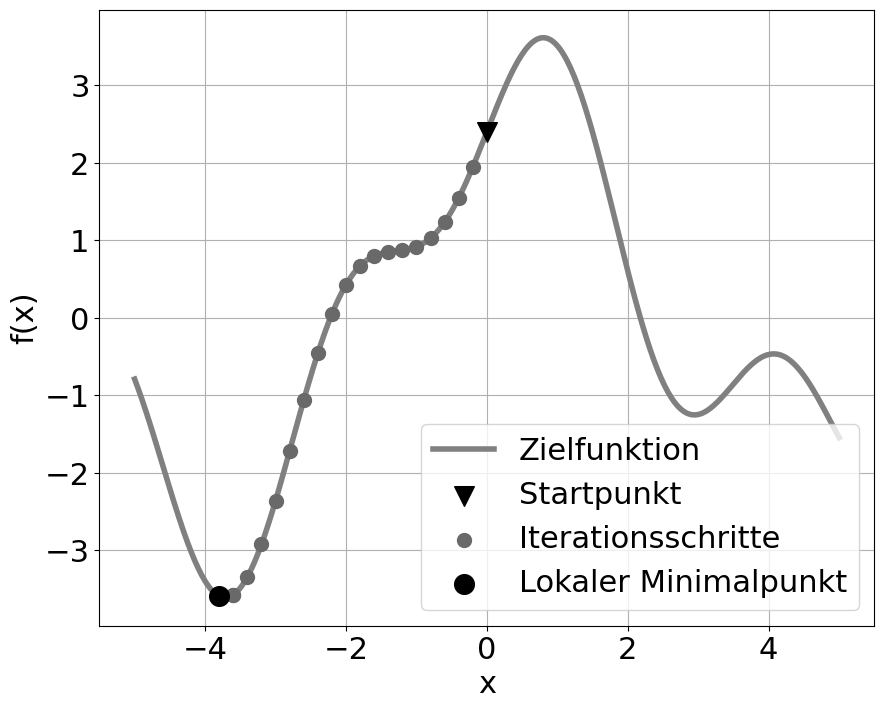

In [189]:
plot_results(f, iterations,start_x, optimal_x, optimal_value)

# Das Gradientenabstiegsverfahren

### Anwendung des Gradientenverfahrens für eine Funktion in einer Variablen

Zunächst wenden wir das Gradientenabstiegsverfahren auf eine eindimensionale Funktion an. 

In [192]:
def gradient_descent(f, start_x, stepsize, num_steps, tolerance=1e-6):
    x = start_x
    iterations = [x]
    
    for i in range(num_steps):
        grad = grad_f_eindim(x)
        x_new = x - stepsize * grad
        
        iterations.append(x_new)
        
        if abs(x_new - x) < tolerance:
            break
            
        if abs(f(x_new) - f(x)) < tolerance:
            break
        
        x = x_new
        
    print("Optimales x:", np.round(x,4))
    print("Minimalwert von f(x):", np.round(f(x),4))
    print("Anzahl Iterationsschritte:", len(np.array(iterations)))
    
    return x, f(x), np.array(iterations)

# Wende das Gradientenabstiegsverfahren an
optimal_x, optimal_value, iterations = gradient_descent(f, start_x, stepsize, num_steps)

Optimales x: -3.716
Minimalwert von f(x): -3.6109
Anzahl Iterationsschritte: 33


### Plotten der Funktion und der Iterationsschritte
Die Iterationsschritte und den Funktionsgraphen werden im Folgenden grafisch dargestellt.

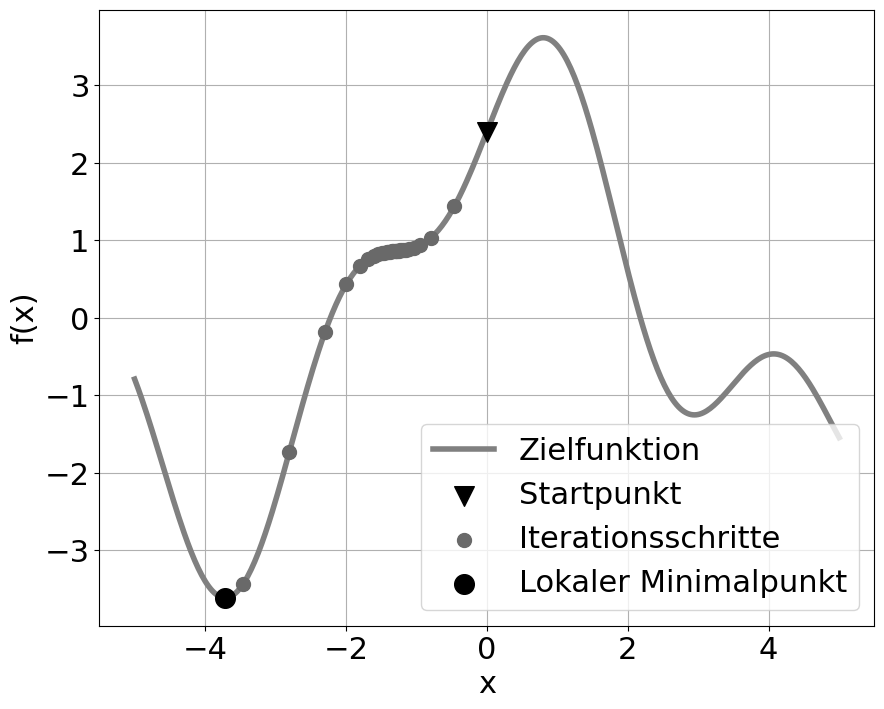

In [191]:
plot_results(f, iterations,start_x, optimal_x, optimal_value)